In [153]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import random      
import copy
from matplotlib import animation

In [154]:
# 参数设置

In [167]:
swarm_size = 50
CR = 0.2
F = 0.5
iter_num = 50
value_range = 10
particle_size = 2

In [156]:
# 初始化粒子

In [157]:
def initial_swarm():
    X = np.zeros((swarm_size,particle_size))
    for i in range(swarm_size):
        for j in range(particle_size):
            X[i][j] = random.random()*2*value_range-value_range
    return X

In [158]:
# 代价函数

In [159]:
def rastrigin(x):
    Z = 10 * particle_size
    for i in range(particle_size):
        Z = Z + x[i] ** 2 - 10 * np.cos(2 * np.pi * x[i])
    return Z

In [160]:
# 差分进化

In [161]:
def diffrential(x):
    u = copy.deepcopy(x)
    ori_aff_arr = []
    for i in range(swarm_size):
        ori_aff_arr.append(rastrigin(x[i]))
        a = list(range(swarm_size))
        a.remove(i)
        random_arr = random.sample(a,3)
        select_x = [x[random_arr[0]],x[random_arr[1]],x[random_arr[2]]]
        u[i] = select_x[0]+F*(select_x[1]-select_x[2])
        u[i] = project(u[i])
    v = copy.deepcopy(x)
    aff_arr = []
    for i in range(swarm_size):
        drand = random.sample(range(particle_size),1)
        for j in range(particle_size):
            if random.random()<CR or j==drand[0]:
                v[i][j]=u[i][j]
            else:
                v[i][j]=x[i][j]
        aff = rastrigin(v[i])
        if aff >= ori_aff_arr[i]:
            v[i] = x[i]
            aff_arr.append(ori_aff_arr[i])
        else:
            aff_arr.append(aff)
    best_aff = min(aff_arr)
    best_i = aff_arr.index(min(aff_arr))
    best_pos = v[best_i]
    return v,best_aff,best_pos

In [162]:
# 控制点在范围内

In [163]:
def project(x):
    for i in range(len(x)):
        if x[i] > value_range:
            x[i] = value_range
        elif x[i] < -value_range:
            x[i] = -value_range
    return x

In [168]:
best_aff_arr = []
x_arr = []
best_pos_arr = []
print('--------------初始化------------')
x = initial_swarm()
for i in range(iter_num):
    print('--------------第'+str(i+1)+'步------------')
    x,best_aff,best_pos = diffrential(x)
    best_aff_arr.append(best_aff)
    x_arr.append(x)
    best_pos_arr.append(best_pos)
    print('最佳的适应度值为：',best_aff)
    print('粒子到过最优位置为：',best_pos)
print('达到终止条件，运行结束')

--------------初始化------------
--------------第1步------------
最佳的适应度值为： 5.759940851536271
粒子到过最优位置为： [-1.04270481 -1.94854698]
--------------第2步------------
最佳的适应度值为： 1.0886905311400046
粒子到过最优位置为： [-0.97915011  0.01494319]
--------------第3步------------
最佳的适应度值为： 1.0886905311400046
粒子到过最优位置为： [-0.97915011  0.01494319]
--------------第4步------------
最佳的适应度值为： 1.0886905311400046
粒子到过最优位置为： [-0.97915011  0.01494319]
--------------第5步------------
最佳的适应度值为： 1.0886905311400046
粒子到过最优位置为： [-0.97915011  0.01494319]
--------------第6步------------
最佳的适应度值为： 1.0886905311400046
粒子到过最优位置为： [-0.97915011  0.01494319]
--------------第7步------------
最佳的适应度值为： 1.0886905311400046
粒子到过最优位置为： [-0.97915011  0.01494319]
--------------第8步------------
最佳的适应度值为： 1.0886905311400046
粒子到过最优位置为： [-0.97915011  0.01494319]
--------------第9步------------
最佳的适应度值为： 1.0886905311400046
粒子到过最优位置为： [-0.97915011  0.01494319]
--------------第10步------------
最佳的适应度值为： 1.0886905311400046
粒子到过最优位置为： [-0.97915011  0.01494319]
----------

<IPython.core.display.Javascript object>


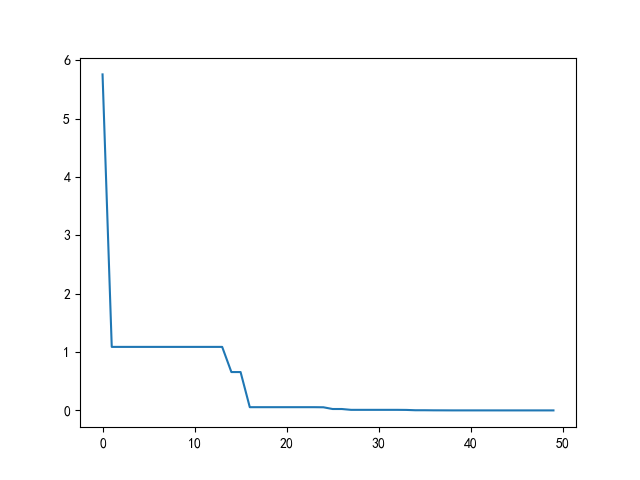

In [169]:
%matplotlib notebook 
plt.plot(best_aff_arr)
plt.show()

<IPython.core.display.Javascript object>


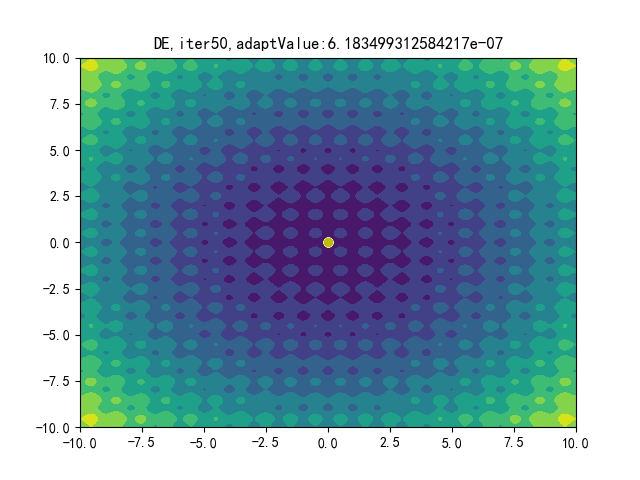

In [170]:
%matplotlib notebook 
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
fig, ax = plt.subplots()
xdata = x_arr
best_data = best_pos_arr
n = 500
x = np.linspace(-value_range, value_range, n)
y = np.linspace(-value_range, value_range, n)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, rastrigin([X,Y]))
point1, = plt.plot(xdata[0][:,0],xdata[0][:,1], 'wo')
point2, = plt.plot(best_data[0][0],best_data[0][1], 'yo')

def init():
    ax.set_xlim(-value_range, value_range)
    ax.set_ylim(-value_range, value_range)
    return point

def update(frame):  # 帧
    point1.set_data(xdata[frame][:,0],xdata[frame][:,1])
    point2.set_data(best_data[frame][0],best_data[frame][1])
    i = frame
    a = rastrigin(best_data[frame])
    ax.set_title('DE,iter'+str(i+1)+',adaptValue:'+str(a),loc = 'center')
    return point

ani = animation.FuncAnimation(
    fig=fig,
    func=update,
    frames=range(len(x_arr)),
    init_func=init,
    interval=500,  # 时间间隔: 毫秒
    repeat=False)


plt.show()
ani.save('DE.gif',writer='pillow')